**Clustering of real data:**
- importare una serie dei prezzi reali
- scegliere un coefficiente da utilizzare come test statistico TS -> come lo scelgo?
- effettuare più clustering (almeno 100) per il medesimo path scelto: in principio il risultato potrebbe dipendere dal tipo di clustering_seed usato
- costruire un istogramma normalizzato di TS per le varie ripetizioni



**Null model generation:**

- fittare un GARCH di qualche tipo al path dei prezzi reali 
- scegliere secondo qualche criterio il miglior GARCH* per descrivere il path di prezzo
- generare molteplici (almeno 100) path di prezzo secondo GARCH*
- per ciascun path sintetico generato effettuare un clustering e calcolare TS
- costruire un istogramma normalizzato per TS

**Assesment:**
- in qualche modo stabilire se i clusters trovati con nei dati reali sono significativi rispetto a quelli trovati: poichè in tale caso avrei due popolazioni potrei utilizzare un Kolmogorov-Smirnov...


# Clustering of real data

In [4]:
import time
import numpy as np
import pandas as pd
import os
# graphycal 
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# clustering
from w_k_means import WassersteinKMeans, w_k_means, w_lift_function
from utils.pre_processing_utils import data_par
from utils.io_utils import ensure_directory_exists
# test statistic
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score

def confidence_interval(x, confidence_level):
    lower_percentile = 100 * (1 - confidence_level) / 2
    upper_percentile = 100 * (1 + confidence_level) / 2

    lower_bound = np.percentile(x, lower_percentile)
    upper_bound = np.percentile(x, upper_percentile)
    
    return lower_bound, upper_bound

In [6]:
# path
path = 'IBM'

# import real data (hourly frequency)
df = pd.read_csv('real_data/' + path.lower() + '_time_series.txt')
prices = df['price'].values
t = df['time'].values
# hourly log returns
log_returns = np.diff(np.log(prices))
N = len(log_returns)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, prices)
plt.ylabel('adjusted price', size=15)
plt.xlabel('time (years)', size=15)
plt.grid()
plt.savefig('ibm_adjusted_price.pdf')

plt.show()

In [ ]:
# # hourly percentage returns
# r = 100 * np.diff(prices) / prices[:-1]
# plt.figure()
# plt.plot(t[:-1], r)
# plt.title('hourly returns')
# plt.ylabel('hourly returns')
# plt.xlabel('time (years)')
# plt.grid()

# plt.figure()
# plt.title('hourly price changes')
# # hourly price changes
# x = np.diff(prices)
# plt.plot(t[:-1], x)
# plt.ylabel('hourly price changes')
# plt.xlabel('time (years)')
# plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t[:-1], log_returns)
plt.ylabel('hourly log returns', size=15)
plt.xlabel('time (years)', size=15)
plt.grid()
plt.savefig('ibm_returns.pdf')

plt.show()

In [19]:
def wk_mu_std_plot(X, wkmeans, off_regime_index, on_regime_index):

    # scatter plot of empirical cdf
    plt.figure(figsize=(10, 6))
    point_size = 15
    plt.scatter(
        np.std(X[wkmeans.labels_ == off_regime_index], axis=1),
        np.mean(X[wkmeans.labels_ == off_regime_index], axis=1),
        marker='.', color='green', alpha=1, s=point_size)
    plt.scatter(
        np.std(X[wkmeans.labels_ == on_regime_index], axis=1),
        np.mean(X[wkmeans.labels_ == on_regime_index], axis=1),  
        marker='.', color='orange', alpha=1, s=point_size)
    # scatter plot of centroids
    plt.scatter(np.std(wkmeans.cluster_centers_, axis=1)[off_regime_index],
                np.mean(wkmeans.cluster_centers_, axis=1)[off_regime_index],
                color='blue', marker='x', label='centroid 0', s=80)
    plt.scatter(np.std(wkmeans.cluster_centers_, axis=1)[on_regime_index],
                np.mean(wkmeans.cluster_centers_, axis=1)[on_regime_index],
                color='red', marker='x', label='centroid 1', s=80)

    plt.xlabel(f'$\sigma$', size=15)
    plt.ylabel(f'$\mu$', size=15)
    plt.legend(fontsize=15)
#     plt.savefig('ibm_w_1_mu_std.pdf')
    plt.show()

def wk_kurt_skew_plot(X, wkmeans, off_regime_index, on_regime_index):
    # scatter plot of empirical cdf
    plt.figure(figsize=(10, 6))
    point_size = 15
    plt.scatter(
        skew(X[wkmeans.labels_ == off_regime_index], axis=1),
        kurtosis(X[wkmeans.labels_ == off_regime_index], axis=1),
        marker='.', color='green', alpha=1, s=point_size)
    plt.scatter(
        skew(X[wkmeans.labels_ == on_regime_index], axis=1),
        kurtosis(X[wkmeans.labels_ == on_regime_index], axis=1),  
        marker='.', color='orange', alpha=1, s=point_size)
    # scatter plot of centroids
    plt.scatter(skew(wkmeans.cluster_centers_, axis=1)[off_regime_index],
                kurtosis(wkmeans.cluster_centers_, axis=1)[off_regime_index],
                color='blue', marker='x', label='centroid 0', s=80)
    plt.scatter(skew(wkmeans.cluster_centers_, axis=1)[on_regime_index],
                kurtosis(wkmeans.cluster_centers_, axis=1)[on_regime_index],
                color='red', marker='x', label='centroid 1', s=80)

    plt.xlabel(f'skew', size=15)
    plt.ylabel(f'excess kurtosis', size=15)
    plt.legend(fontsize=15)
#     plt.savefig('ibm_w_1_kurt_skew.pdf')
    plt.show()

silhouette score = 0.3873902763533741


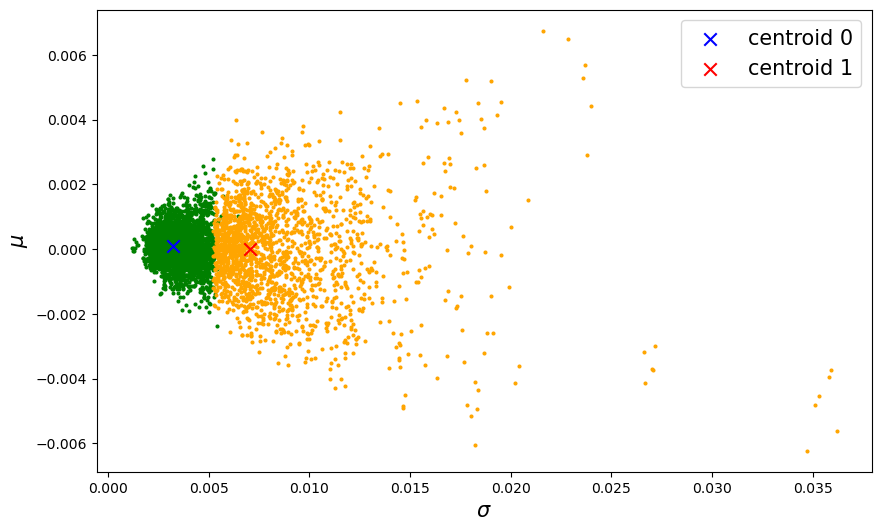

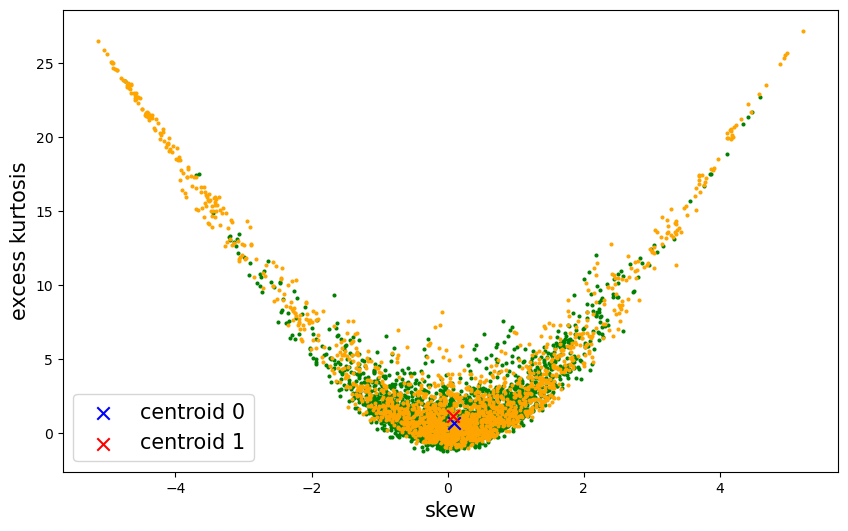

In [18]:
# clustering pre processing parameters 
h1 = 35
h2 = 28
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
# clustering parameters 
p = 1
max_iter = 600
tol = 1e-8

# pre processing
N_prime, M = data_par(N, h1, h2)

# actual variables
actual_log_returns = np.diff(np.log(prices))[: N_prime]

# clustering pre processing
X_wasserstein = w_lift_function(h1, h2, actual_log_returns, M)

# clustering implementation
wkmeans, off_regime_index, on_regime_index = w_k_means(X_wasserstein, p, max_iter, tol, seed_clustering=1)


distance_matrix = pairwise_distances(X_wasserstein, metric='minkowski', p=p) / (X_wasserstein.shape[1]**(1/p))
print(f"silhouette score = {silhouette_score(distance_matrix, wkmeans.labels_, metric='precomputed')}")

wk_mu_std_plot(X_wasserstein, wkmeans, off_regime_index, on_regime_index)

wk_kurt_skew_plot(X_wasserstein, wkmeans, off_regime_index, on_regime_index)



## MMD approach

In [4]:
# CLUSTERING VALIDATION

def compute_mmd_squared(x, y, sigma=0.1):
    n = len(x)
    m = len(y)

    # Compute the MMD terms
    K_xx = np.exp(-np.square(x[:, np.newaxis] - x[np.newaxis, :]) / (2 * sigma ** 2))
    K_xy = np.exp(-np.square(x[:, np.newaxis] - y[np.newaxis, :]) / (2 * sigma ** 2))
    K_yy = np.exp(-np.square(y[:, np.newaxis] - y[np.newaxis, :]) / (2 * sigma ** 2))

    # Compute the MMD terms using matrix operations
    term1 = np.sum(K_xx) / (n * n)
    term2 = np.sum(K_xy) / (m * n)
    term3 = np.sum(K_yy) / (m * m)

    # MMD^2 is the square of the difference
    mmd_squared = term1 - 2 * term2 + term3

    # Return the square root of the MMD^2
    return mmd_squared

def between_cluster_sim(n, matrix, kmeans, off_regime):
    
    if off_regime == 0:
        on_regime = 1
    else:
        on_regime = 0
        
    # matrix is the lift_matrix
    mmd_squared_bet_array = np.zeros(n)

    # Number of elements in each cluster
    k_off = len(matrix[kmeans.labels_ == off_regime])
    k_on = len(matrix[kmeans.labels_ == on_regime])

    # Samples from cluster OFF
    random_indexes_off = np.random.randint(0, k_off, size=n)
    subs_off = matrix[kmeans.labels_ == off_regime][random_indexes_off]

    # Samples from cluster ON
    random_indexes_on = np.random.randint(0, k_on, size=n)
    subs_on = matrix[kmeans.labels_ == on_regime][random_indexes_on]

    # Calculate MMD for each sample pair
    for i, (x, y) in enumerate(zip(subs_off, subs_on)):
        mmd_squared_bet_array[i] = compute_mmd_squared(x, y)
        
    return mmd_squared_bet_array

def inter_cluster_sim(n, matrix, kmeans, c):
    
    k = len(matrix[kmeans.labels_ == c])
    # number of pairs from a cluster
    mmd_squared_inter_array = np.zeros(n)
    # random indexes
    random_indexes_off = np.random.randint(0, k, size=n)
    random_indexes_on = np.random.randint(0, k, size=n)

    # samples 0
    subs_0 = matrix[kmeans.labels_ == c][random_indexes_off]

    # samples 1
    subs_1 = matrix[kmeans.labels_ == c][random_indexes_on]

    # calculate MMD for each sample pair
    for i, (x, y) in enumerate(zip(subs_0, subs_1)):
        mmd_squared_inter_array[i] = compute_mmd_squared(x, y)

    return mmd_squared_inter_array

In [15]:
# clustering pre processing parameters 
h1 = 63
h2 = 47
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
# clustering parameters 
p = 1
max_iter = 600
tol = 1e-8

# pre processing
N_prime, M = data_par(N, h1, h2)

# actual variables
actual_log_returns = np.diff(np.log(prices))[: N_prime]

# clustering pre processing
X_wasserstein = w_lift_function(h1, h2, actual_log_returns, M)

# validation parameters
n_samples = 100000
n_trials = 100

b_SIM_matrix = np.zeros((n_trials, n_samples))
w_SIM_off_matrix = np.zeros((n_trials, n_samples))
w_SIM_on_matrix = np.zeros((n_trials, n_samples))

start = time.time()
for i in range(n_trials):
    
    # clustering implementation
    wkmeans, off_regime_index, on_regime_index = w_k_means(X_wasserstein, p, max_iter, tol)
    
    # validation
    b_SIM_matrix[i] = between_cluster_sim(n_samples, X_wasserstein, wkmeans, off_regime_index)
    w_SIM_off_matrix[i] = inter_cluster_sim(n_samples, X_wasserstein, wkmeans, off_regime_index)
    w_SIM_on_matrix[i] = inter_cluster_sim(n_samples, X_wasserstein, wkmeans, on_regime_index)
    
end = time.time() - start
    
print(f'execution time = {end} s')


directory_path = f'validation_results/{path}/W_k_means/h_{h1}_{h2}/max_iter_{max_iter}_tol_{tol}/p_{p}'
ensure_directory_exists(directory_path)

file_path1 = os.path.join(directory_path, "bet_score.txt")
file_path2 = os.path.join(directory_path, "w_off_score.txt")
file_path3 = os.path.join(directory_path, "w_on_score.txt")

np.savetxt(file_path1, np.median(b_SIM_matrix, axis=1))
np.savetxt(file_path2, np.median(w_SIM_off_matrix, axis=1))
np.savetxt(file_path3, np.median(w_SIM_on_matrix, axis=1))

execution time = 1000.1710000038147 s
Directory validation_results/IBM/W_k_means/h_63_47/max_iter_600_tol_1e-08/p_1 already existed. You might have overwritten the data!


In [51]:
# Specifica il percorso del file
file_path = "validation_results/IBM/W_k_means/h_35_28/max_iter_600_tol_1e-08/p_1/w_on_score.txt"

# Caricamento del file come array NumPy
try:
    # Per file semplici (valori separati da spazi, tab o virgole)
    score = np.loadtxt(file_path)
    
except Exception as e:
    print(f"Errore durante il caricamento del file: {e}")

mean value = 0.0002279614872547797
95% CI = (0.00022358612478533824, 0.0002304601090588443)


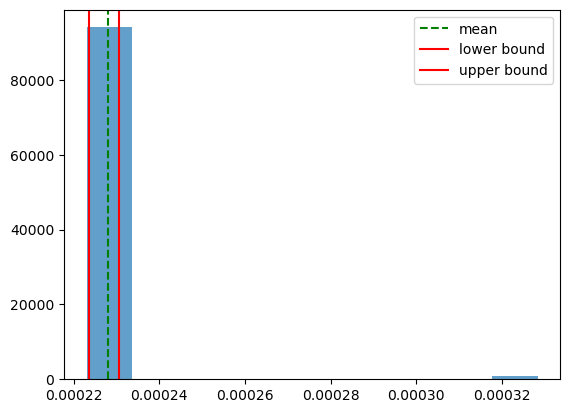

In [52]:
confidence_level = 0.95
lower_bound, upper_bound = confidence_interval(score, confidence_level)
print(f'mean value = {np.mean(score)}')
print(f'{int(100*confidence_level)}% CI = {(lower_bound, upper_bound)}')
plt.hist(score, bins=int(np.sqrt(len(score))), density=True, alpha=0.7)
plt.axvline(x=np.mean(score), color='green', linestyle='--', label='mean')
plt.axvline(x=lower_bound, color='red', linestyle='-', label='lower bound')
plt.axvline(x=upper_bound, color='red', linestyle='-', label='upper bound')
plt.legend()
plt.show()

mean value = 0.0002269482200031931
95% CI = (0.00022356586921000178, 0.00023020694169767763)


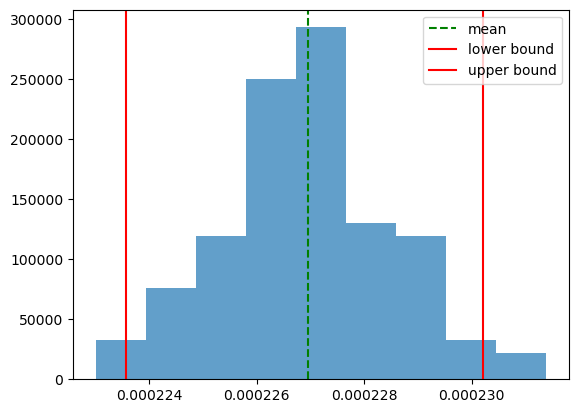

In [53]:
# removing out-liers
s = score[score < 3e-04]
confidence_level = 0.95
lower_bound, upper_bound = confidence_interval(s, confidence_level)
print(f'mean value = {np.mean(s)}')
print(f'{int(100*confidence_level)}% CI = {(lower_bound, upper_bound)}')
plt.hist(s, bins=int(np.sqrt(len(s))), density=True, alpha=0.7)
plt.axvline(x=np.mean(s), color='green', linestyle='--', label='mean')
plt.axvline(x=lower_bound, color='red', linestyle='-', label='lower bound')
plt.axvline(x=upper_bound, color='red', linestyle='-', label='upper bound')
plt.legend()
plt.show()